In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math 

<function matplotlib.pyplot.show>

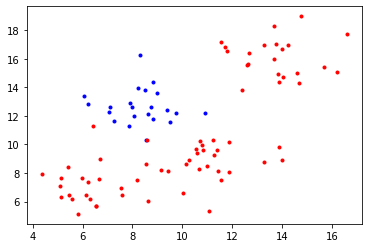

In [2]:
[X_train, y_train, X_test, y_test] = np.load("TP4.npy",allow_pickle=True)

T_train = X_train[np.where(y_train==1),:] 

T_train = np.reshape(T_train,(T_train.shape[1],T_train.shape[2] )) # classe 1

F_train = X_train[np.where(y_train==0),:] 
F_train = np.reshape(F_train,(F_train.shape[1],F_train.shape[2] ))  #classe 0
plt.plot(F_train[:,0], F_train[:,1], '.b') 
plt.show
plt.plot(T_train[:,0], T_train[:,1], '.r') 
plt.show

In [ ]:
""" Quelle est la dimension des données ? Le nombre d’exemples par classe ?Peut-on modéliser les classes par une gaussienne ? """

In [19]:
print("dimension X_test : " , np.shape(X_test) )
print("dimension X_train : " , np.shape(X_train) )
print("dimension y_test : " , np.shape(y_test) )
print("dimension y_train : " , np.shape(y_train) )
print("Le nombre d'exemples par classes : " , '\n')
print("classe 1 : " , len(T_train) , '\n')
print("classe 0 : " , len(F_train) , '\n')

N = len(T_train) 

dimension X_test :  (30, 2)
dimension X_train :  (90, 2)
dimension y_test :  (30,)
dimension y_train :  (90,)
Le nombre d'exemples par classes :  

classe 1 :  68 

classe 0 :  22 



Peut-on modéliser les classes par une gaussienne ? 

In [11]:
def norm2(x, m, cov): 
  a = np.dot(np.transpose((x-m)), np.linalg.inv(cov)) 
  a = np.dot(a, (x-m)) 
  p =1/(math.sqrt(2*math.pi*np.linalg.det(cov)))*math.exp(-0.5*a)
  return p

In [ ]:
""" ddp_parzen(𝒙,𝑿,𝑪𝒐𝒗) = ( 1/ 𝑁 )Σ𝑛𝑜𝑟𝑚2(𝒙,𝒙𝒊,𝐶𝒐𝒗) """ 

In [30]:
def ddp_parzen(x,X,Cov) : 
  N = len(X) 
  return sum(norm2(x,Xi,Cov) for Xi in X)/ N



  

Rappeler le principe de fonctionnement de l’estimation de densité de probabilité par noyau. Que représente le noyau ? : 

Elle se base sur un échantillon d’une population statistique et permet d’estimer la densité en tout point du support. En ce sens, cette méthode généralise astucieusement la méthode d’estimation par un histogramme


In [ ]:
""" Estimer la densité de probabilité (ddp) pour les pixels de classe C0 p(x/C0) et C1 p(x/C1). 
Afin de visualiser ces ddp, estimer les en tout point 𝒙=[𝑥𝑎𝑥𝑏] d’une grille carrée (1≤𝑥𝑎,𝑥𝑏≤20) 
et stocker les dans deux matrices 𝑝0 et 𝑝1 que l’on pourra visualiser sous forme d’images 
(attention à retourner l’image avant de la visualiser, np.flipud). Visualiser la ddp de chacune des deux classes et faire varier sigma """

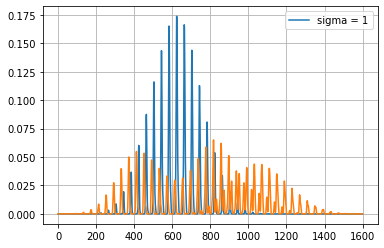

In [59]:
p0 = []
p1 =[]
xa = np.linspace(1,20,40) 
xb = np.linspace(1,20,40) 

xx = []
yy = []



sigma = 1 

for i in xa : 
  for j in xb : 

    x = [i,j]
    p0.append( ddp_parzen(x, F_train ,np.identity(2)))
    p1.append( ddp_parzen(x, T_train ,np.identity(2)))
    xx.append(i)
    yy.append(j)
  
plt.plot(p0)
plt.plot(p1)
plt.legend(["sigma = {}".format(sigma)])
plt.grid()






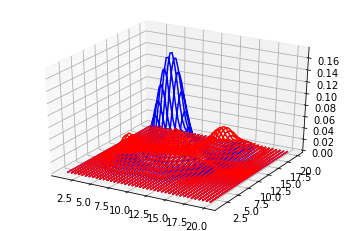

In [60]:
from mpl_toolkits import mplot3d

fig = plt.figure() 

ax = plt.axes(projection='3d')

# Data for a three-dimensional line


zline = p0
zline2 = p1
xline = xx
yline = yy
ax.plot3D(xline, yline, zline, 'b')
ax.plot3D(xline, yline, zline2, 'r')
